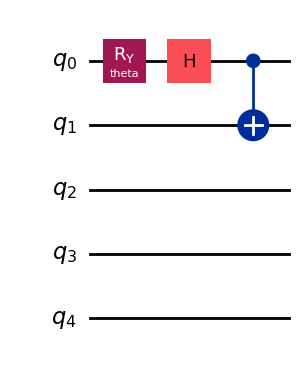

In [2]:
#Import the necessary libraries 
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from sklearn.datasets import load_iris
import pandas as pd


%matplotlib inline
# circuit for which you want to obtain the expected value
qc = QuantumCircuit(5)
qc.ry(Parameter('theta'), 0)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl", style="iqp")




In [6]:
# Load the iris dataset as a pandas DataFrame
iris = load_iris()


#Convert the dataset to a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


#Add the target column to the DataFrame, using target_names to map integers to class labels
iris_df['target'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(iris_df.head(5))
print(iris.DESCR)



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Stat

In [ ]:


features = iris.data
labels = iris.target

#maps the data [0,1]
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)



In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

sns.pairplot(df, hue="class", palette="tab10")

In [ ]:
# Applying PCA
pca = PCA(n_components=2)  # 

In [ ]:
#splitting data useful for later evaluation 

from sklearn.model_selection import train_test_split
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 123  # Setting seed for reproducibility
train_features, test_features, train_labels, test_labels = train_test_split(
    features_standardized, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [ ]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()